# EASY AND FUN IMAGE

I studied keypoint detection...

In [1]:
import os 
import cv2 # computer vision libraries
import matplotlib.pyplot as plt 
import numpy as np
import dlib # for image processing, face detection

print(cv2.__version__)
print(dlib.__version__)


4.5.3
19.22.1


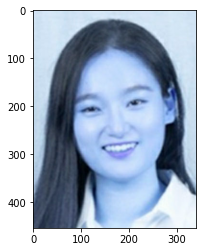

In [2]:
sticker_path = './data/cat-whiskers.png' 
my_image_path = './data/hongseoi.jpg'

img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
plt.imshow(img_bgr) 
plt.show()

The color of the picture looks blue. It's because of the characteristic of opencv. So we need to correct the image using other image libraries.

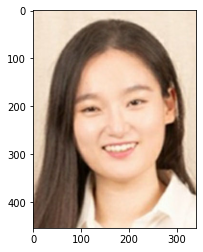

In [3]:
# change image as RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
plt.imshow(img_rgb)
plt.show()

## Face Detection

- Use face detector of dlib, find face in the picture
- face detector finds faces using HOC and SVM

### HOG(Histogram of Oriented Gradients)

- A value representing the amount of change in color in an image
- Method used before deep learning appeared
- Able to capture the features of an object in an image

<img src="https://d3s0tskafalll9.cloudfront.net/media/images/e-8v2-3-1_YFw8FVD.max-800x600.png">
     
### SVM(Support Vector Machine)
- linear classifier
- How to properly distinguish images that are vectors in multidimensional space
- SVM does not show great power with only the color of the image, but it works well if the amount of change in image color is expressed through HOG.


In [4]:
# decare detector
detector_hog = dlib.get_frontal_face_detector() # return basic face detector


In [5]:
# export b.b using detector hog
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)


rectangles[[(68, 142) (291, 365)]]


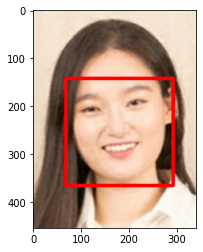

In [6]:
# face box list

print(dlib_rects)   

for dlib_rect in dlib_rects: # Coordinates of the found face area
    l = dlib_rect.left() 
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,0,255), 5, lineType=cv2.LINE_AA) 

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

Face detected!

## FACE LANDMARK LOCALIZATION
- Face landmark detection is to infer the location of features.

- This technique of finding a point inside an object is called an object keypoint estimation algorithm.
- Algorithms are largely divided into top-down and bottom-up methods.


In this notebook ,I'm using top-down estimation

In [7]:
model_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = [] # 랜드마크 위치 저장할 리스트

# find face landmark per face
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # save all the location data of landmark at points variable
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # change each location data as the shape of (x,y) and save it in list_points list
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))


68


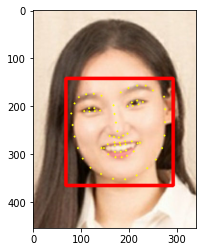

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)
plt.show()


## ADD sticker

In [10]:
# Position the sticker

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose index is 30
    x = landmark[30][0] # nose location x
    y = landmark[30][1] - dlib_rect.height()//2  # nose location y
    w = h = dlib_rect.width() # The number of pixels occupying the horizantal area of the face //2
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(175, 252)
(x,y) : (175,140)
(w,h) : (224,224)


In [11]:
# load sticker
img_sticker = cv2.imread(sticker_path) #, cv2.IMREAD_UNCHANGED
img_sticker = cv2.resize(img_sticker, (w,h)) 
print (img_sticker.shape)

(224, 224, 3)


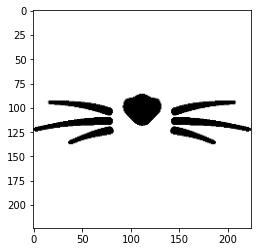

In [12]:
plt.imshow(img_sticker)
    
plt.show()

In [13]:
refined_x = x - w // 2 
refined_y = y

print (f'(x,y) : ({refined_x},{refined_y})') 

(x,y) : (63,140)


In [14]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 고양이 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (63,140)


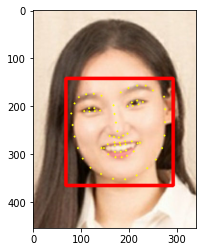

In [15]:
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()

In [16]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)


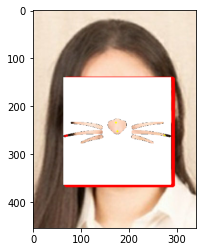

In [17]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


### 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?

얼굴 각도에 따라 스티커도 같은 각도로 기울어져야 한다.

### 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
옆으로 누워서 촬영할 경우에도 얼굴이 사진과 수직으로 있는 것처럼 인식한다.

### 실행 속도가 중요할까요?
스티커 앱을 만든다고 했을 때, 빠른 속도가 필요하기 때문에 속도가 중요하다.

### 스티커앱을 만들 때 정확도가 얼마나 중요할까요?
사실 정확도가 필요하긴 하겠지만 일정 이상의 정확도는 중요하지 않은 것 같다. 오히려 속도가 더 중요하다고 생각된다.